  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.778954614513536
        x: [ 2.224e+00  9.845e-01 ...  0.000e+00  1.148e-01]
      nit: 7
      jac: [-1.121e-06  1.366e-06 ... -9.104e-07 -3.531e-06]
     nfev: 2408
     njev: 8
 hess_inv: <300x300 LbfgsInvHessProduct with dtype=float64>


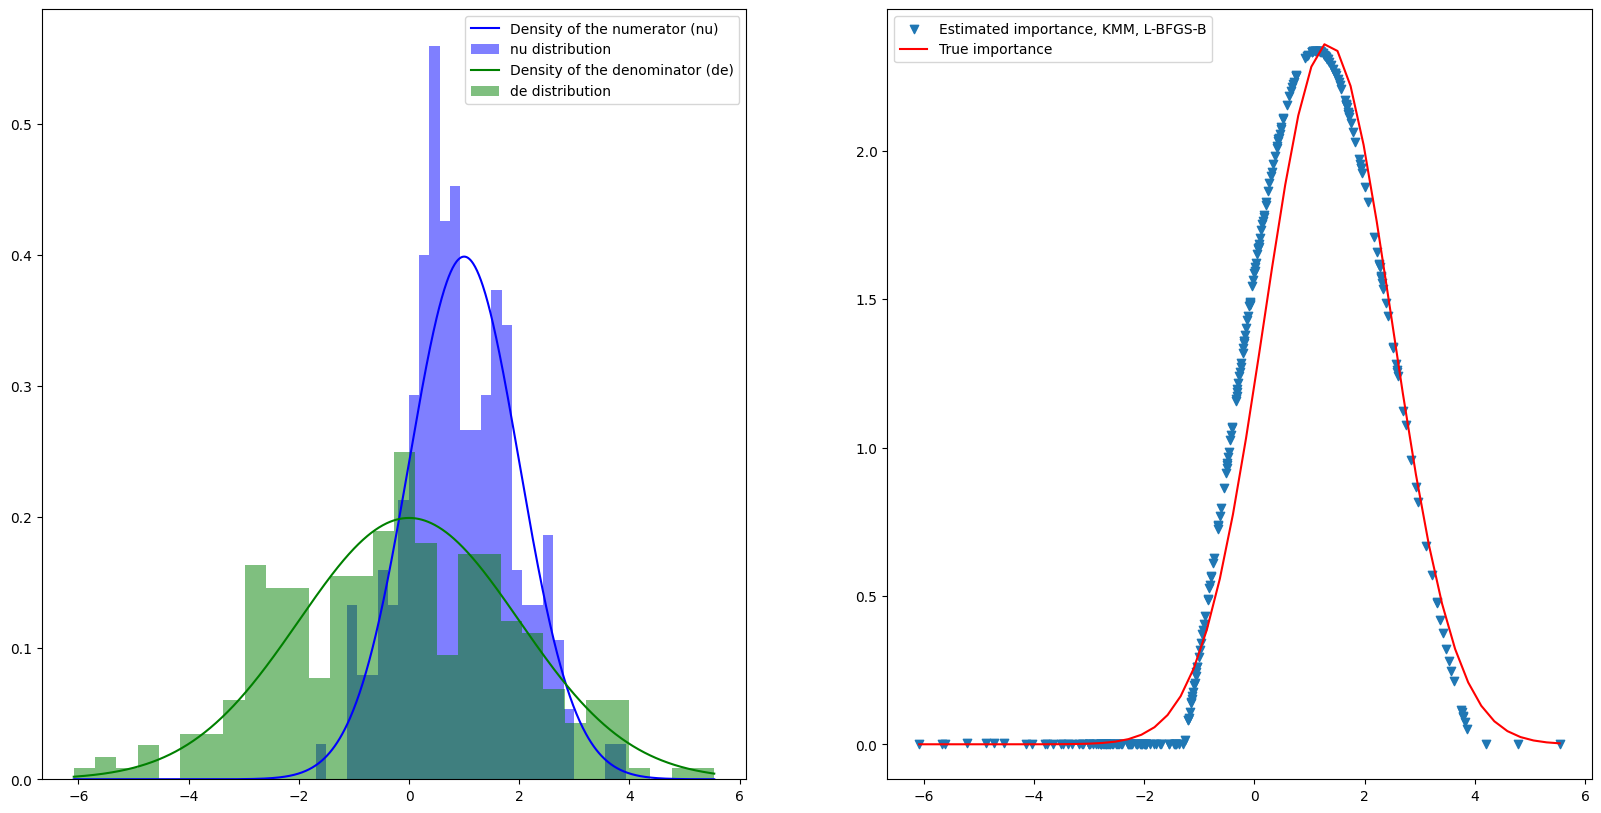

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
import importlib
from mpl_toolkits.mplot3d import Axes3D
import functions

importlib.reload(functions)


plot_precision = 1000

# inital parameters
n_nu, mu_nu, sigma_nu = 200, 1, 1
n_de, mu_de, sigma_de = 300, 0, 2

# create randomized data
nu_data = np.random.normal(loc = mu_nu, scale = sigma_nu, size = n_nu)
de_data = np.random.normal(loc = mu_de, scale = sigma_de, size = n_de)

# define densities functions for comparison
f_nu = lambda x: 1/np.sqrt(2*np.pi*sigma_nu**2)*np.exp(-(x - mu_nu)**2/(2*sigma_nu**2))
f_de = lambda x: 1/np.sqrt(2*np.pi*sigma_de**2)*np.exp(-(x - mu_de)**2/(2*sigma_de**2))

# ratio to be estimated
w = lambda x: f_nu(x)/f_de(x)

tmp_nu = list(nu_data)
tmp_de = list(de_data)

n_nu = len(nu_data)
n_de = len(de_data)
l = []


for i in range(n_nu):
    for j in range(n_de):
        l.append(np.linalg.norm(nu_data[i]- de_data[j]))

#combined = sorted(tmp_nu + tmp_de) 
l = sorted(l)
sigma = np.median(l)


K = lambda x,y: np.exp(-(x-y)**2/(2*sigma**2))
r1 = functions.KMM_inf_approach_w_nonneg(de_data, nu_data, "L-BFGS-B", K)
x = np.linspace(min(min(de_data), min(nu_data)), max(max(de_data), max(nu_data)), plot_precision)
x2 = np.linspace(min(de_data), max(de_data))

_, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(x, f_nu(x), label = "Density of the numerator (nu)", color = "blue")
ax[0].hist(nu_data, density = True, color = "blue", label = "nu distribution", alpha = 0.5, bins = 30)
ax[0].plot(x, f_de(x), label = "Density of the denominator (de)", color = "green")
ax[0].hist(de_data, density = True, color = "green", label = "de distribution", bins = 30, alpha = 0.5)
#ax[0].plot(x, w(x), label = "Importance", color = "red")
ax[0].legend()
ax[1].scatter(de_data, r1, label = "Estimated importance, KMM, L-BFGS-B", marker = "v")
ax[1].plot(x2, w(x2), label = "True importance", color = "red")
ax[1].legend()



In [53]:
w = de_data
n_de = len(de_data)
K_de = np.array([[K(de_data[i], de_data[j]) for j in range(n_de)] for i in range(n_de)])+ 10e-2 * np.eye(n_de)
print(w.reshape(-1,1).shape)
print(K_de.shape)

np.transpose(w.reshape(-1,1)) @ K_de @ w-np.transpose(w.reshape(-1,1)) @ K_de @ np.ones((n_de, 1))

(300, 1)
(300, 300)


array([[68865.77008145]])